# THE SPARK FOUNDATION

# Task1-Predict the percentage of marks of student based on the no. of study hours using Supevised ML.

# Author:-Apoorv Bhandari

# GRIPjune21

In [2]:
#Import the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#to load the dataset
url="http://bit.ly/w-data"  #dataset url
data=pd.read_csv(url)
print("Data is succesfully imported")
data


Data is succesfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
#to check the dimensions of the dataset
data.shape

(25, 2)

In this dataset we have 25 rows and 2 columns.


In [10]:
#to check the top & bottom 5 values
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [12]:
#to check the statistical analysis of dataset like mean,median,mode, standard deviation etc.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
#now check the missing values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No missing value found

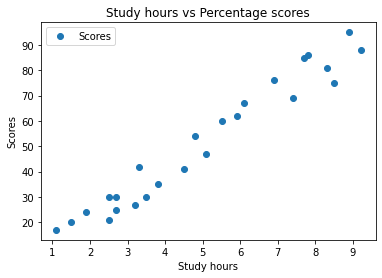

In [35]:
#visualizing the data using scatterplot
data.plot(x="Hours",y="Scores",style='o')
plt.title("Study hours vs Percentage scores")
plt.xlabel("Study hours")
plt.ylabel("Scores")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [36]:
#to check the correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Preparing the data
The next step is to divide the data into "attributes" (x) and "labels" (y).

In [39]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

# Splitting the data into training and testing

In [42]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Training the model

In [41]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# Plotting the regression line

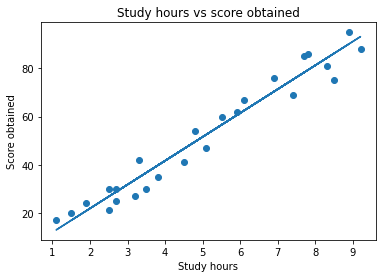

In [48]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.xlabel("Study hours")
plt.ylabel("Score obtained")
plt.title("Study hours vs score obtained")
plt.plot(X, line);
plt.show()

now training is complete let's test the model

# Making Predictions
Now that we have trained our model, it's time to make some predictions

In [49]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [50]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Prediction of scores when student studies for 9.25 hours

In [54]:
hours = 9.25
test= np.array([hours])
test= test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# So if a student studies for 9.25 per day he/she can score 93.6917%

# Evaluating the model

In [55]:
#lets evaluate the model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
